In [166]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Reading The CSV
data=pd.read_csv('crime.csv',engine='python')

In [103]:
data.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,NaN,2018-10-03 20:13:00,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)"
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795,NaN,2018-08-30 20:00:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.352111,-71.135311,"(42.35211146, -71.13531147)"
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,NaN,2018-10-03 19:20:00,2018,10,Wednesday,19,Part Two,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)"
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,NaN,2018-10-03 20:00:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.359454,-71.059648,"(42.35945371, -71.05964817)"
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,NaN,2018-10-03 20:49:00,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)"


In [105]:
data['INCIDENT_NUMBER'].count()

327820

In [106]:
#Districts in Boston

data['DISTRICT'].unique()


array(['E18', 'D14', 'B2', 'A1', 'A7', 'C11', nan, 'D4', 'E13', 'B3',
       'C6', 'A15', 'E5'], dtype=object)

In [107]:
data['DISTRICT']=data['DISTRICT'].map({'E18':'Hyde Park', 'D14':'Brighton', 
                                       'B2':'Roxbury', 'A1':'Downtown', 
                                       'A7':'East Boston', 'C11':'Dorchester', 
                                       'D4':'South End', 'E13':'Jamaica Plain', 
                                       'B3':'Mattapan', 'C6':'South Boston', 
                                       'A15':'Charlestown', 'E5':'West Roxbury'})

In [108]:
data['DISTRICT'].describe()

count      326046
unique         12
top       Roxbury
freq        51288
Name: DISTRICT, dtype: object

In [109]:
data['DISTRICT'].value_counts()

Roxbury          51288
Dorchester       43817
South End        43338
Downtown         36735
Mattapan         36400
South Boston     24190
Brighton         20632
Jamaica Plain    17981
Hyde Park        17825
East Boston      13634
West Roxbury     13543
Charlestown       6663
Name: DISTRICT, dtype: int64

In [110]:
#Streets

data['STREET'].unique()

array(['ARLINGTON ST', 'ALLSTON ST', 'DEVON ST', ..., 'NEWCOMB',
       'MT PLEASANT AVE', 'SAVIN HILL AV'], dtype=object)

In [111]:
#Top 25 Streets with most Crimes
data['STREET'].value_counts().head(25)

WASHINGTON ST          14590
BLUE HILL AVE           8002
BOYLSTON ST             7425
DORCHESTER AVE          5297
TREMONT ST              4925
MASSACHUSETTS AVE       4865
HARRISON AVE            4739
CENTRE ST               4487
COMMONWEALTH AVE        4291
HYDE PARK AVE           3572
COLUMBIA RD             3298
HUNTINGTON AVE          3058
RIVER ST                2902
DUDLEY ST               2440
WARREN ST               2423
COLUMBUS AVE            2369
ADAMS ST                2104
BEACON ST               2016
NEWBURY ST              1937
CAMBRIDGE ST            1719
BOWDOIN ST              1718
GENEVA AVE              1681
AMERICAN LEGION HWY     1672
W BROADWAY              1661
ALBANY ST               1466
Name: STREET, dtype: int64

In [112]:
#Years For which we are Analysing the data

data['YEAR'].unique()

array([2018, 2017, 2016, 2015], dtype=int64)

In [113]:
data['YEAR'].describe()

count    327820.000000
mean       2016.598676
std           1.009775
min        2015.000000
25%        2016.000000
50%        2017.000000
75%        2017.000000
max        2018.000000
Name: YEAR, dtype: float64

The above dataset has details for 327820 crimes in the city of Boston, for 12 districts from 2015-2018. Most of the crimes have been reported in the year 2018, maximum crimes being for B2 district and WASHINGTON ST street.

# Analysing Districts of Boston

In [114]:
#District Wise Crime & SHooting Distribution

district_data = data.groupby(by= 'DISTRICT')
district_data_counts = district_data.count()
district_data_counts[['INCIDENT_NUMBER','SHOOTING']]

,INCIDENT_NUMBER,SHOOTING
DISTRICT,,
Brighton,20632,21
Charlestown,6663,5
Dorchester,43817,195
Downtown,36735,12
East Boston,13634,17
Hyde Park,17825,35
Jamaica Plain,17981,70
Mattapan,36400,227
Roxbury,51288,352


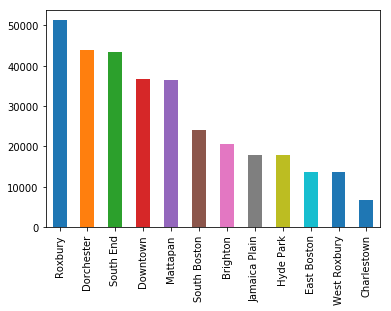

In [115]:
#Plotting Crime Count District Wise

data['DISTRICT'].value_counts().plot.bar()

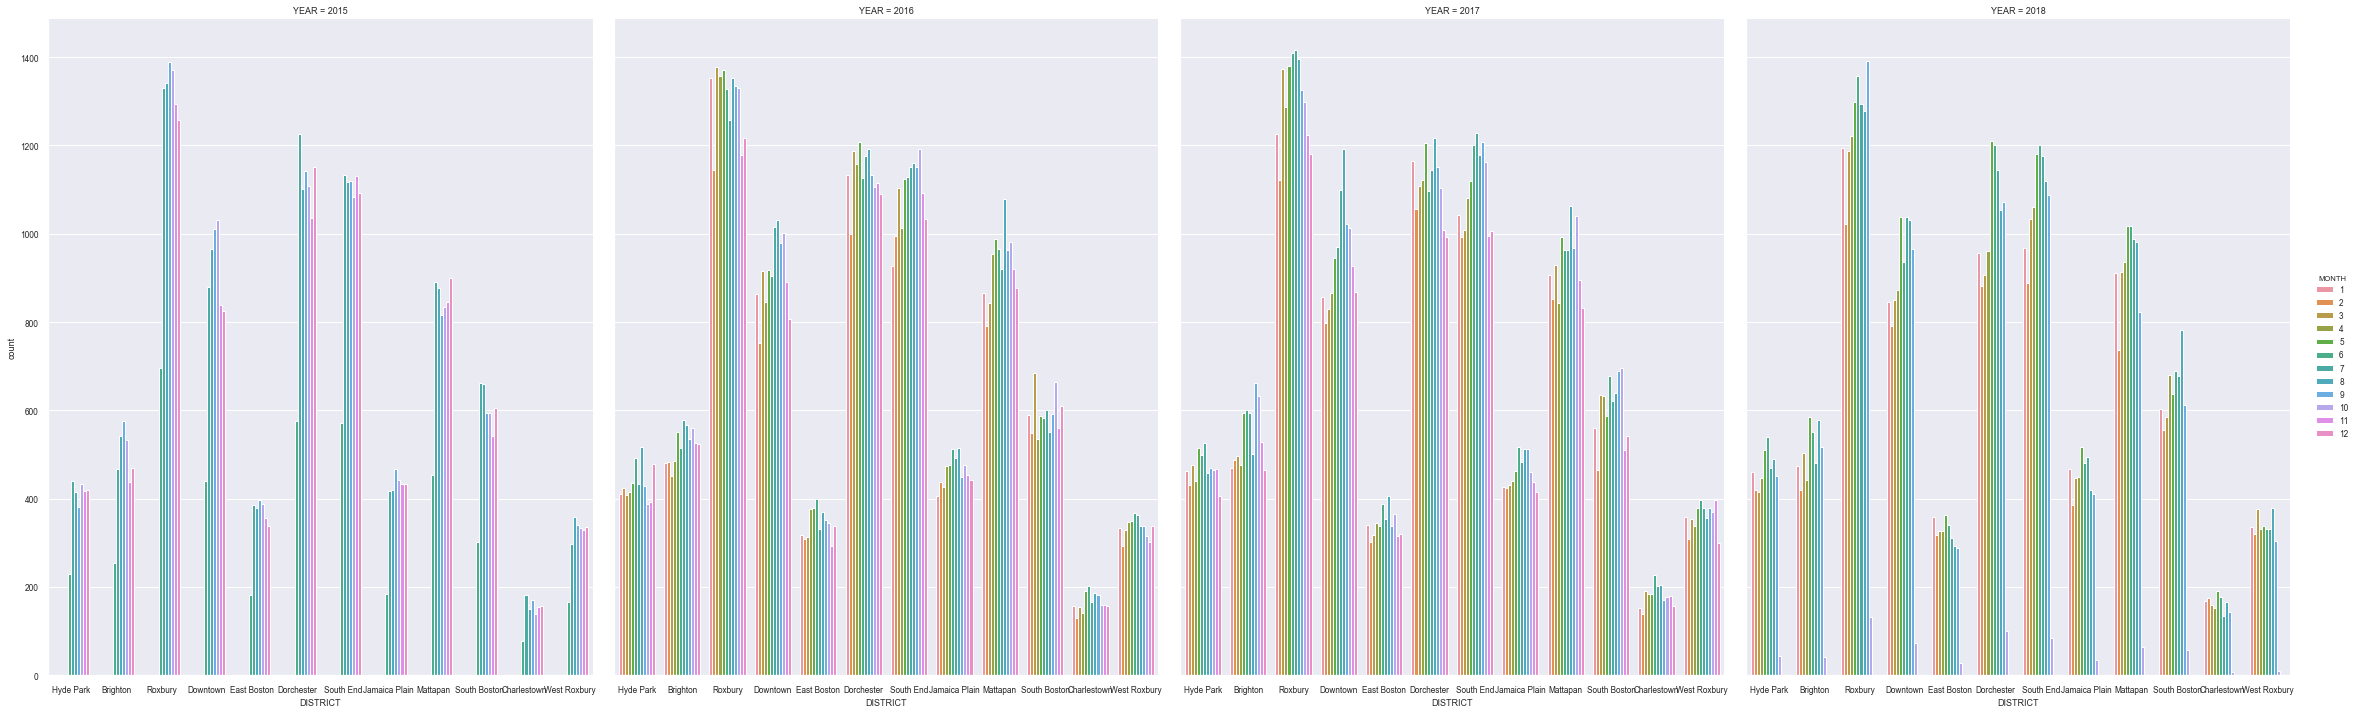

In [119]:
#District Wise Crime Count Year and Month Wise Distribution

sns.set(font_scale=0.75)
sns.catplot(x="DISTRICT", col="YEAR", hue="MONTH", data=data, orient="h", height=10, aspect=0.8, kind="count")

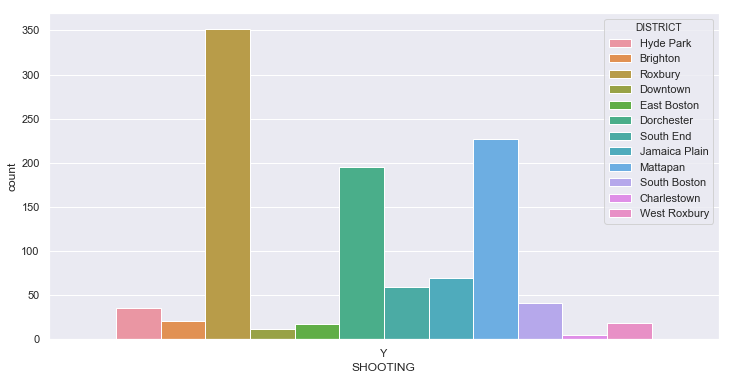

In [122]:
#Plotting Shooting Data District Wise

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1)
width=12
height=6
plt.figure(figsize = (width,height) )
sns.countplot(x="SHOOTING", hue="DISTRICT", data = data)
plt.show()


<Figure size 864x720 with 0 Axes>

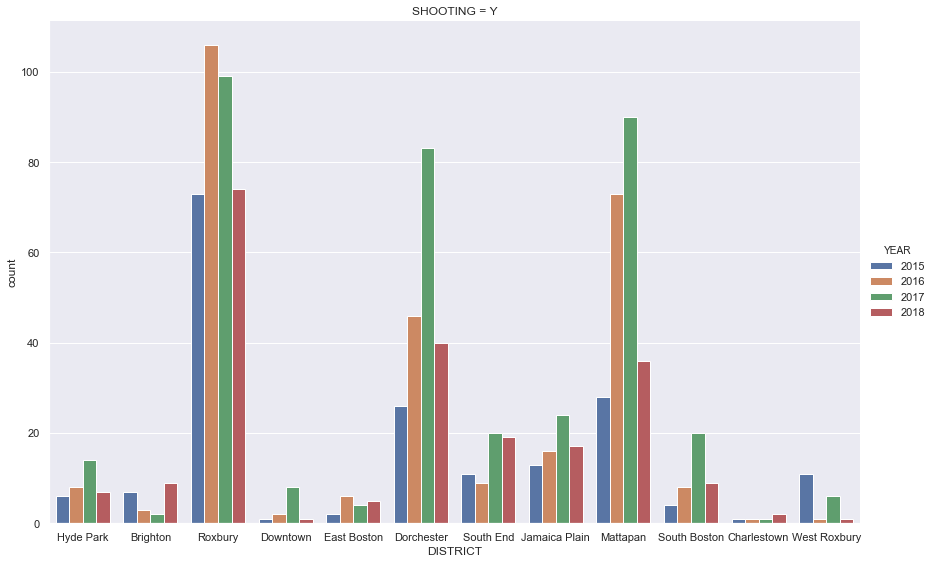

In [133]:
#District Wise Shooting Count Year Wise Distribution

sns.set(font_scale=1)

plt.figure(figsize = (width,height) )
sns.catplot(x="DISTRICT", col="SHOOTING", hue="YEAR", data=data,  height=8, aspect=1.5, kind="count")

From The Above Visualizations, we observe that:

District B2(Roxbury) has the highest total crime rate for 4 years.


# Analysing Streets of Boston

In [134]:
df = data['STREET'].value_counts().head(25)
df

WASHINGTON ST          14590
BLUE HILL AVE           8002
BOYLSTON ST             7425
DORCHESTER AVE          5297
TREMONT ST              4925
MASSACHUSETTS AVE       4865
HARRISON AVE            4739
CENTRE ST               4487
COMMONWEALTH AVE        4291
HYDE PARK AVE           3572
COLUMBIA RD             3298
HUNTINGTON AVE          3058
RIVER ST                2902
DUDLEY ST               2440
WARREN ST               2423
COLUMBUS AVE            2369
ADAMS ST                2104
BEACON ST               2016
NEWBURY ST              1937
CAMBRIDGE ST            1719
BOWDOIN ST              1718
GENEVA AVE              1681
AMERICAN LEGION HWY     1672
W BROADWAY              1661
ALBANY ST               1466
Name: STREET, dtype: int64

In [135]:
#selecting top 25 streets

STREET_SELECTED = ('WASHINGTON ST',
'BLUE HILL AVE', 
'BOYLSTON ST', 
'DORCHESTER AVE', 
'TREMONT ST',
'MASSACHUSETTS AVE',
'HARRISON AVE',
'CENTRE ST',
'COMMONWEALTH AVE',
'HYDE PARK AVE',
'COLUMBIA RD',
'HUNTINGTON AVE',
'RIVER ST',
'DUDLEY ST',
'WARREN ST',
'COLUMBUS AVE',
'ADAMS ST',
'BEACON ST',
'NEWBURY ST',
'CAMBRIDGE ST',
'BOWDOIN ST',
'GENEVA AVE',
'AMERICAN LEGION HWY',
'W BROADWAY',
'ALBANY ST')

In [136]:
processedData = pd.DataFrame()
k = 0
while k  < len(STREET_SELECTED):
    processedData = processedData.append(data.loc[data['STREET']==STREET_SELECTED[k]])
    k = k+1
processedData.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
35,I182080016,1402,Vandalism,VANDALISM,Dorchester,405,NaN,2018-09-30 00:00:00,2018,9,Sunday,0,Part Two,WASHINGTON ST,42.272345,-71.068718,"(42.27234506, -71.06871774)"
106,I182079942,613,Larceny,LARCENY SHOPLIFTING,Downtown,103,NaN,2018-10-03 14:47:00,2018,10,Wednesday,14,Part One,WASHINGTON ST,42.356801,-71.058930,"(42.35680075, -71.05893025)"
123,I182079923,3125,Warrant Arrests,WARRANT ARREST,Dorchester,398,NaN,2018-10-03 13:25:00,2018,10,Wednesday,13,Part Three,WASHINGTON ST,42.288739,-71.071126,"(42.28873871, -71.07112627)"
130,I182079915,3108,Fire Related Reports,"FIRE REPORT - HOUSE, BUILDING, ETC.",Dorchester,454,NaN,2018-10-03 14:09:00,2018,10,Wednesday,14,Part Three,WASHINGTON ST,42.300226,-71.074683,"(42.30022551, -71.07468313)"
131,I182079914,3160,Fire Related Reports,"FIRE REPORT - CAR, BRUSH, ETC.",Dorchester,454,NaN,2018-10-03 14:09:00,2018,10,Wednesday,14,Part Three,WASHINGTON ST,42.300226,-71.074683,"(42.30022551, -71.07468313)"


In [138]:
#Street Wise Crime & Shooting Distribution

street_data = processedData.groupby(by= 'STREET')
street_data_counts = street_data.count()
street_data_counts[['INCIDENT_NUMBER','SHOOTING']]


,INCIDENT_NUMBER,SHOOTING
STREET,,
ADAMS ST,2104,9
ALBANY ST,1466,0
AMERICAN LEGION HWY,1672,3
BEACON ST,2016,0
BLUE HILL AVE,8002,35
BOWDOIN ST,1718,10
BOYLSTON ST,7425,4
CAMBRIDGE ST,1719,0
CENTRE ST,4487,16


<Figure size 1080x432 with 0 Axes>

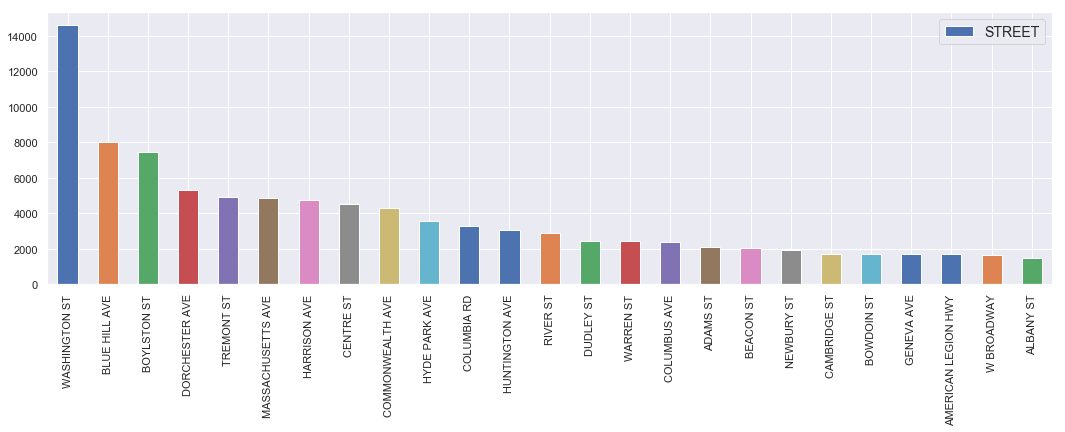

In [190]:
#Plotting Crime Count Street Wise for Top 25 streets

sns.set(font_scale=1)
width=15
height=6
plt.figure(figsize = (width,height) )
f, ax = plt.subplots(figsize=(18,5))
processedData['STREET'].value_counts().plot.bar()



<Figure size 1080x432 with 0 Axes>

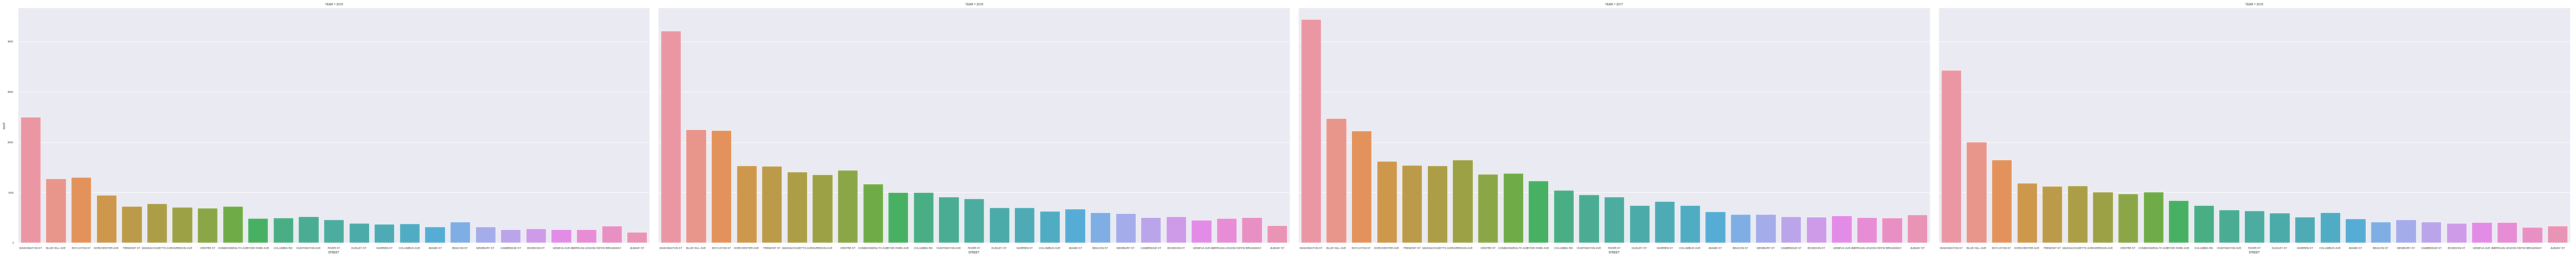

In [168]:
#Street Wise Crime Count Year Wise Distribution

sns.set(font_scale=0.55)

plt.figure(figsize = (width,height) )
sns.catplot(x="STREET", col="YEAR", data=processedData,height=8, aspect=2.5, kind="count")

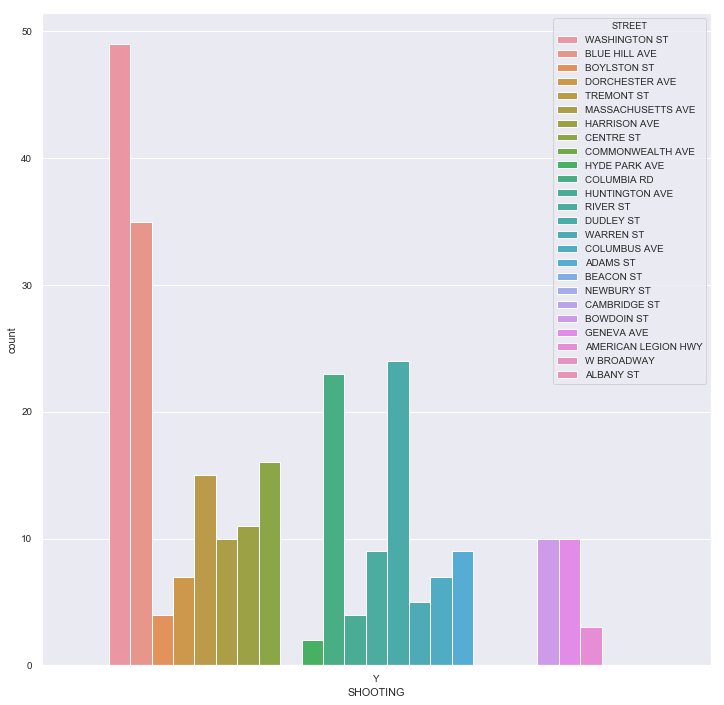

In [177]:
#Plotting Shooting Data Street Wise

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=0.9)
width=12
height=12
plt.figure(figsize = (width,height) )
sns.countplot(x="SHOOTING", hue="STREET", data = processedData)
plt.show()



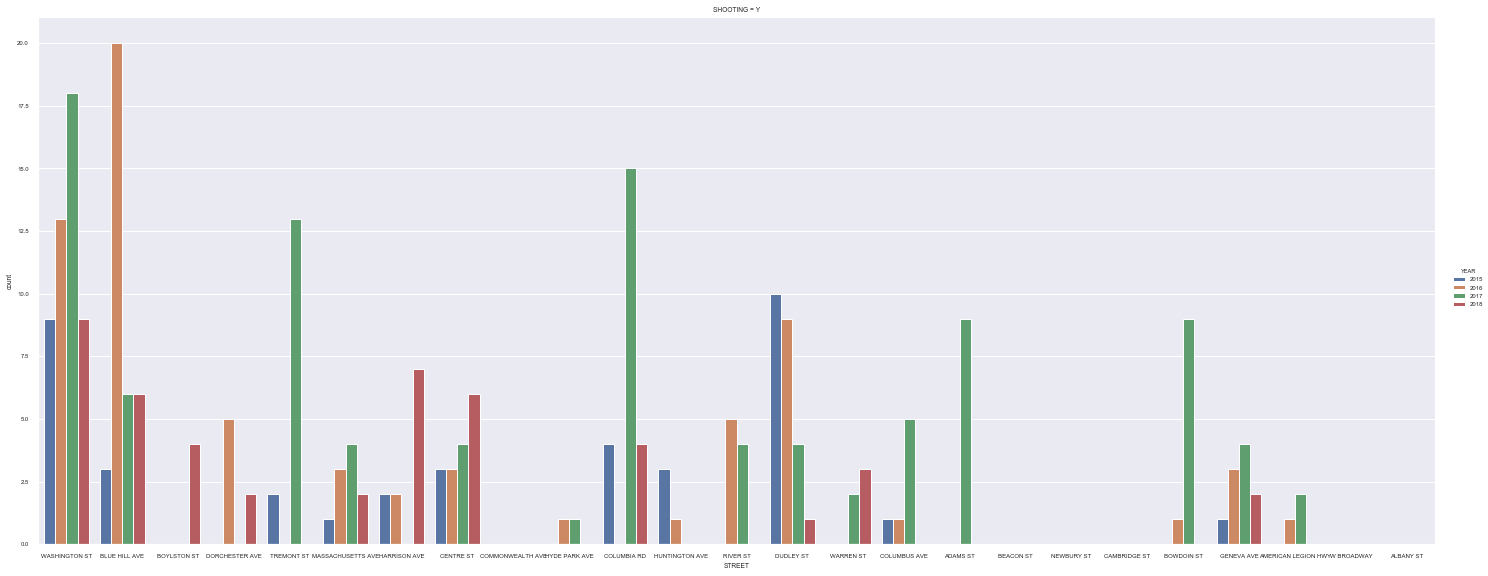

In [181]:
#Street Wise Shooting Count Year Wise Distribution

sns.set(font_scale=0.55)
sns.catplot(x="STREET", col="SHOOTING", hue="YEAR",  data=processedData,height=8, aspect=2.5, kind="count")



From The Above Visualizations, we observe that:

Street: Washington has the highest total crime rate for 4 years.


# Analysing Data Year Wise

In [182]:
#Year Wise Crime & SHooting Distribution

year_data = data.groupby(by= 'YEAR')
year_data_counts = year_data.count()
year_data_counts[['INCIDENT_NUMBER','SHOOTING']]

,INCIDENT_NUMBER,SHOOTING
YEAR,,
2015,53392,185
2016,99134,279
2017,100938,371
2018,74356,220


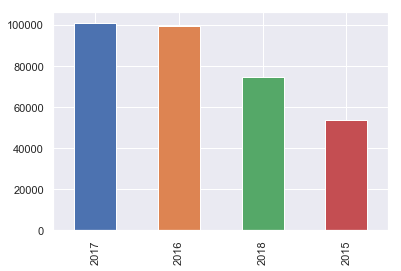

In [189]:
#Plotting Crime Count Year Wise

data['YEAR'].value_counts().plot.bar()

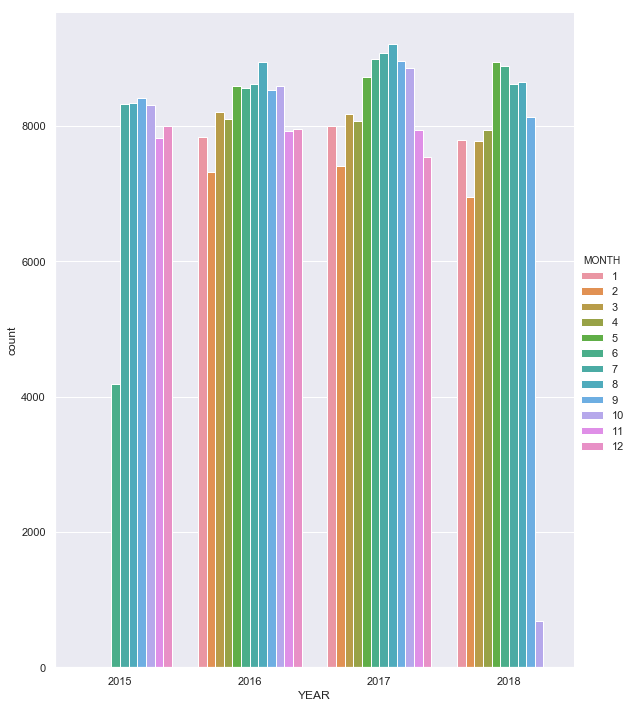

In [188]:
# Crime Count Year and Month Wise Distribution

sns.set(font_scale=1)

sns.catplot(x="YEAR" , hue="MONTH", data=data, orient="h", height=10, aspect=0.8, kind="count")

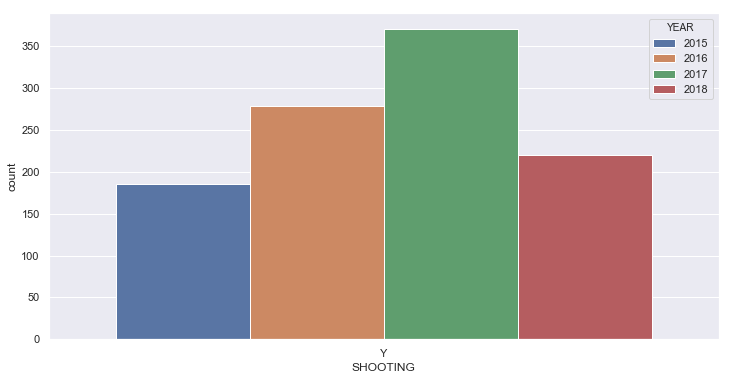

In [191]:
#Plotting Shooting Data Year Wise

import matplotlib.pyplot as plt
import seaborn as sns

width=12
height=6
plt.figure(figsize = (width,height) )
sns.countplot(x="SHOOTING", hue="YEAR", data = data)
plt.show()


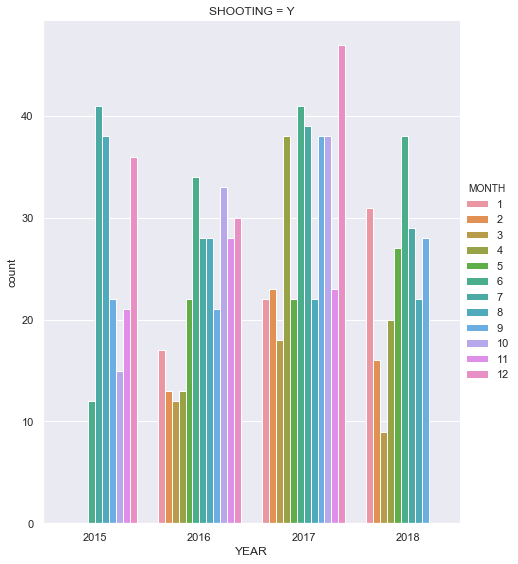

In [192]:
#Year-Month Wise Shooting Count Distribution

sns.catplot(x="YEAR", col="SHOOTING", hue="MONTH", data=data, orient="h", height=8, aspect=0.8, kind="count")

From The Above Visualizations, we observe that:

District B2(Roxbury) has the highest total crime rate for 4 years.


# Analysing Data Month Wise

In [193]:
#Month Wise Crime & SHooting Distribution

month_data = data.groupby(by= 'MONTH')
month_data_counts = month_data.count()
month_data_counts[['INCIDENT_NUMBER','SHOOTING']]

,INCIDENT_NUMBER,SHOOTING
MONTH,,
1,23625,70
2,21661,52
3,24156,39
4,24108,71
5,26242,71
6,30622,125
7,34640,137
8,35137,110
9,34023,109


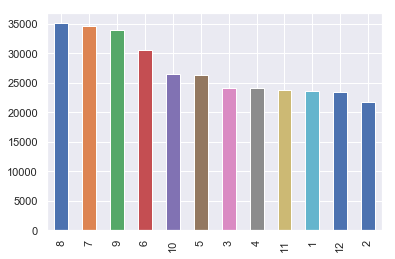

In [194]:
#Plotting Crime Count Month Wise

data['MONTH'].value_counts().plot.bar()

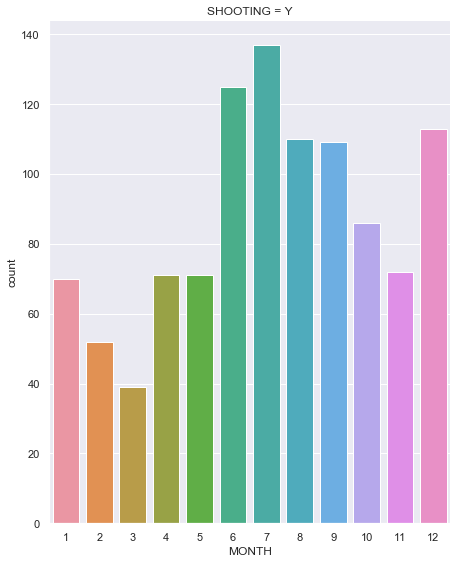

In [195]:
#District Wise Shooting Count Year Wise Distribution

sns.catplot(x="MONTH", col="SHOOTING", data=data, orient="h", height=8, aspect=0.8, kind="count")

# Analysing Data Hour Wise

In [211]:
#Hour Wise Crime & SHooting Distribution

month_data = data.groupby(by= 'HOUR')
month_data_counts = month_data.count()
month_data_counts[['INCIDENT_NUMBER','SHOOTING']]

,INCIDENT_NUMBER,SHOOTING
HOUR,,
0,15534,109
1,9502,46
2,7895,62
3,4710,29
4,3505,18
5,3409,9
6,5174,14
7,9095,0
8,13441,9


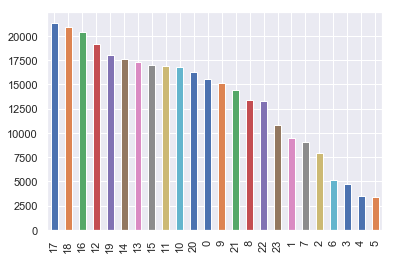

In [210]:
#Plotting Crime Count Hour Wise

data['HOUR'].value_counts().plot.bar()

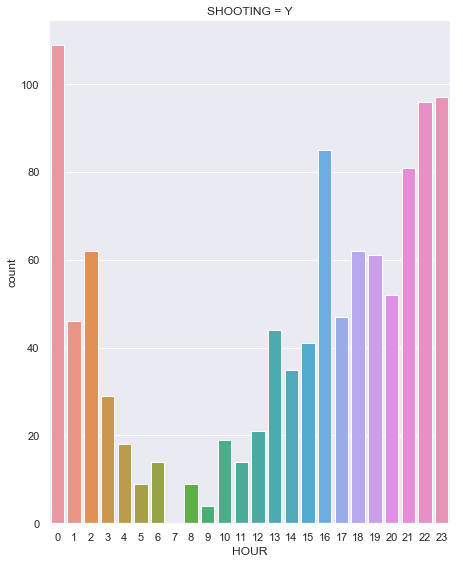

In [213]:
#District Wise Shooting Distribution

sns.catplot(x="HOUR", col="SHOOTING", data=data, orient="h", height=8, aspect=0.8, kind="count")

# Analysing Data Week Day Wise

In [214]:
#Week Day Wise Crime & SHooting Distribution

month_data = data.groupby(by= 'DAY_OF_WEEK')
month_data_counts = month_data.count()
month_data_counts[['INCIDENT_NUMBER','SHOOTING']]

,INCIDENT_NUMBER,SHOOTING
DAY_OF_WEEK,,
Friday,49758,147
Monday,46970,123
Saturday,45969,239
Sunday,41374,158
Thursday,47872,132
Tuesday,47726,116
Wednesday,48151,140


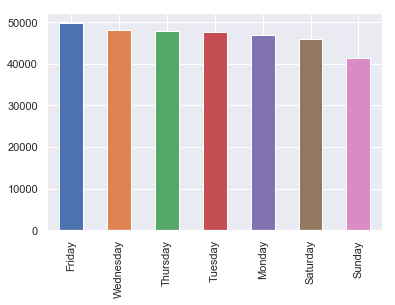

In [215]:
#Plotting Crime Count Week Day Wise

data['DAY_OF_WEEK'].value_counts().plot.bar()

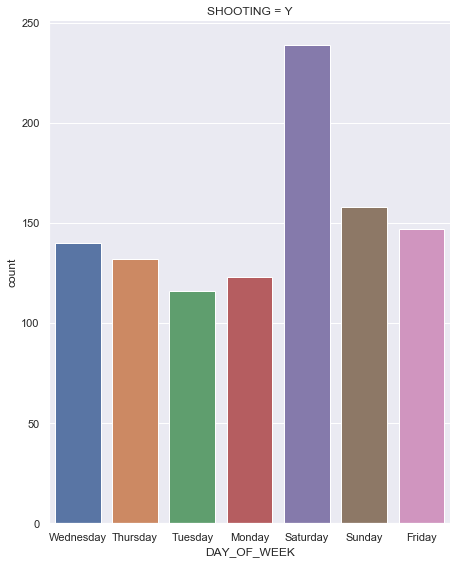

In [216]:
#Day of Week Wise Shooting Count Distribution

sns.catplot(x="DAY_OF_WEEK", col="SHOOTING", data=data, orient="h", height=8, aspect=0.8, kind="count")

# Analysing Data UCR-PART Wise

In [218]:
#UCR_PART Wise Crime & SHooting Distribution

month_data = data.groupby(by= 'UCR_PART')
month_data_counts = month_data.count()
month_data_counts[['INCIDENT_NUMBER','SHOOTING']]

,INCIDENT_NUMBER,SHOOTING
UCR_PART,,
Other,1285,1
Part One,63231,681
Part Three,162928,177
Part Two,100283,191


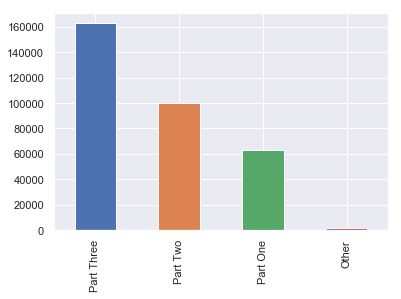

In [219]:
#Plotting Crime Count UCR_PART Wise

data['UCR_PART'].value_counts().plot.bar()

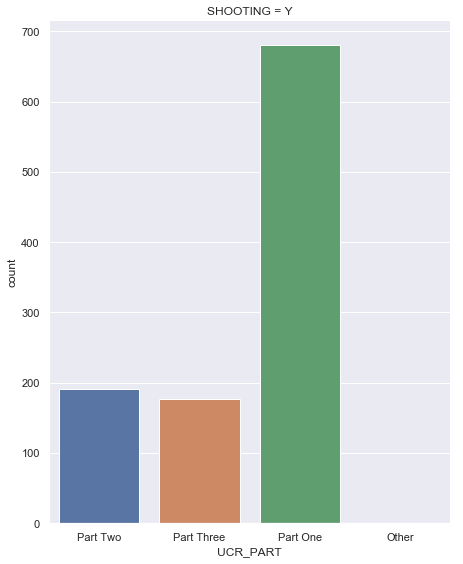

In [220]:
#UCR_PART Wise Shooting Count Distribution

sns.catplot(x="UCR_PART", col="SHOOTING", data=data, orient="h", height=8, aspect=0.8, kind="count")

# Analysing Data Offense Code Wise

In [199]:
#Offence data year wise
offense_data_distribution = pd.pivot_table(data.loc[:,['OFFENSE_CODE_GROUP','YEAR','OFFENSE_CODE']], columns='YEAR', index='OFFENSE_CODE_GROUP',  aggfunc = np.count_nonzero)
offense_data_distribution

OFFENSE_CODE                    \
YEAR                                              2015     2016     2017   
OFFENSE_CODE_GROUP                                                         
Aggravated Assault                              1386.0   2365.0   2405.0   
Aircraft                                           4.0      4.0     22.0   
Arson                                             11.0     34.0     32.0   
Assembly or Gathering Violations                 240.0    333.0    243.0   
Auto Theft                                       988.0   1537.0   1393.0   
Auto Theft Recovery                              137.0    312.0    371.0   
Ballistics                                       166.0    303.0    339.0   
Biological Threat                                  NaN      NaN      2.0   
Bomb Hoax                                         17.0     38.0     11.0   
Burglary - No Property Taken                       1.0      1.0      NaN   
Commercial Burglary                              253.0    431.0    432.0   
Confidence Games                                 657.0   1078.0    890.0   
Counterfeiting                                   276.0    494.0    457.0   
Criminal Harassment                               43.0     35.0     28.0   
Disorderly Conduct                               469.0    825.0    852.0   
Drug Violation                                  3300.0   5284.0   4761.0   
Embezzlement                                      61.0     84.0    108.0   
Evading Fare                                      79.0    128.0    116.0   
Explosives                                         6.0      7.0      7.0   
Fire Related Reports                             310.0    613.0    589.0   
Firearm Discovery                                175.0    188.0    212.0   
Firearm Violations                               382.0    552.0    488.0   
Fraud                                            994.0   1816.0   1738.0   
Gambling                                           2.0      NaN      6.0   
HOME INVASION                                      NaN     29.0     32.0   
HUMAN TRAFFICKING                                  NaN      2.0      5.0   
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE          NaN      1.0      1.0   
Harassment                                       359.0   1366.0   1479.0   
Harbor Related Incidents                          12.0     55.0    101.0   
Homicide                                          27.0     47.0     54.0   
...                                                ...      ...      ...   
License Violation                                228.0    585.0    501.0   
Liquor Violation                                 191.0    278.0    358.0   
Manslaughter                                       NaN      5.0      4.0   
Medical Assistance                              3139.0   6978.0   7817.0   
Missing Person Located                           829.0   1708.0   1495.0   
Missing Person Reported                          640.0   1285.0   1166.0   
Motor Vehicle Accident Response                 5827.0  11534.0  12049.0   
Offenses Against Child / Family                  119.0    164.0    161.0   
Operating Under the Influence                    118.0    189.0    166.0   
Other                                           3379.0   5538.0   5323.0   
Other Burglary                                   112.0    135.0    133.0   
Phone Call Complaints                              6.0      9.0      4.0   
Police Service Incidents                         752.0    864.0    423.0   
Prisoner Related Incidents                        40.0     74.0     75.0   
Property Found                                   640.0   1102.0   1301.0   
Property Lost                                   1525.0   2856.0   3121.0   
Property Related Damage                          140.0    294.0    287.0   
Prostitution                                      43.0     70.0     87.0   
Recovered Stolen Property                        257.0    434.0    464.0   
Residential Bu

In [204]:
#Ten Most Frequent Offenses in Boston for 4 years

total_offense = pd.DataFrame(offense_data_distribution.apply (np.sum,axis=1))
total_offense =  total_offense.rename(columns={0:'Sum'})
total_offense = total_offense.sort_values(by='Sum', ascending=False)
mostFrequentTen =  total_offense.iloc[0:10,:]
mostFrequentTen

,Sum
OFFENSE_CODE_GROUP,
Motor Vehicle Accident Response,38134.0
Larceny,26670.0
Medical Assistance,24226.0
Investigate Person,19176.0
Other,18612.0
Drug Violation,17037.0
Simple Assault,16263.0
Vandalism,15810.0
Verbal Disputes,13478.0


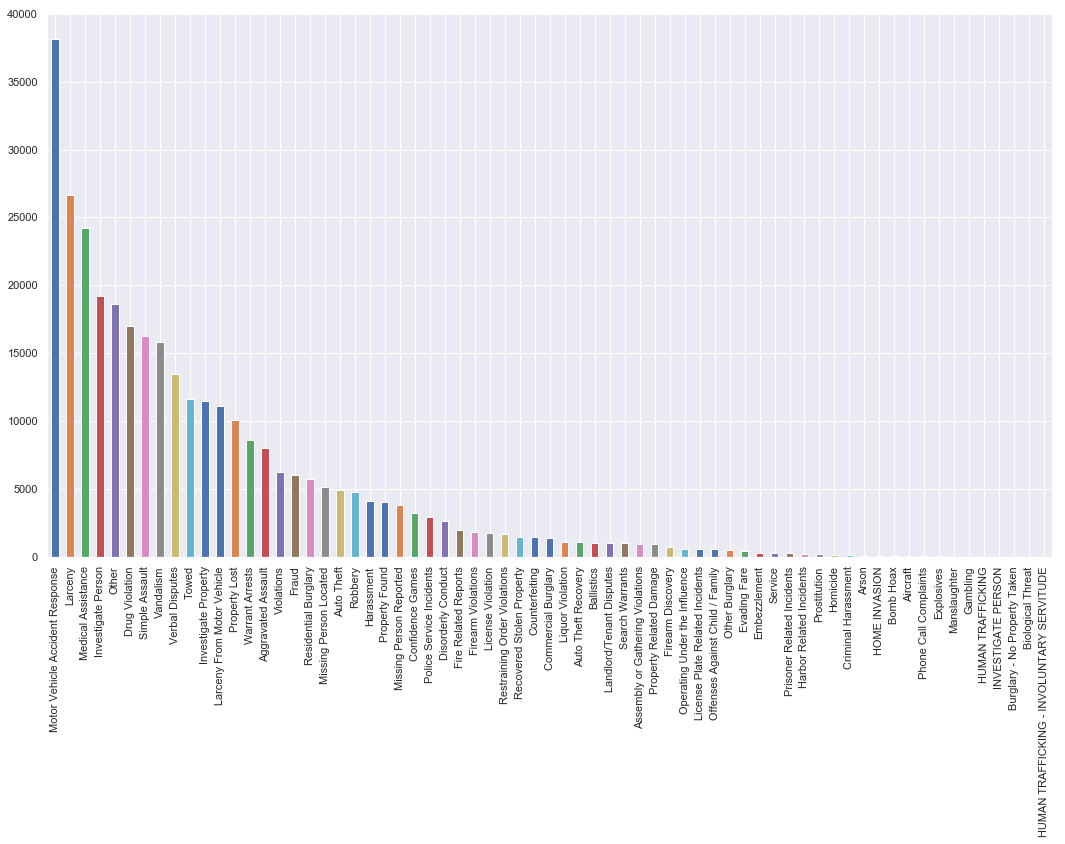

In [207]:
#Plotting the data as per the Offense Code Group

plt.figure(figsize=(18,10))

data['OFFENSE_CODE_GROUP'].value_counts().plot.bar()
plt.show()

<Figure size 1296x720 with 0 Axes>

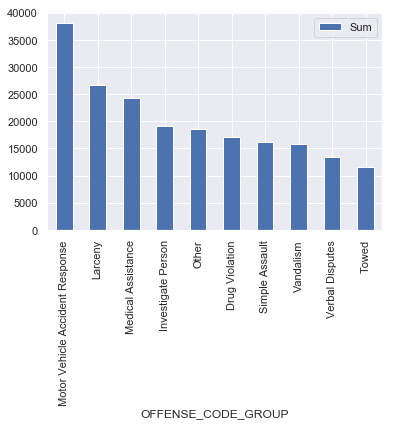

In [208]:
# Plotting Ten Most Frequent Crimes

plt.figure(figsize=(18,10))

mostFrequentTen.plot.bar()
plt.show()